In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import pickle

In [8]:
from core.DataEmbeddingGraph import DataEmbeddingGraph
from util.mnist_data_loader import get_train_set, get_test_set
from util.plot_embedding import plot_embedding, plot_embedding_subplot
from util.draw_random_subset import draw_random_subset
from core.DimReduction import DimReduction

In [4]:
# Load Mnist dataset
parent_dir = os.path.abspath('..')
data_dir = parent_dir + '/data/mnist'
train_data = get_train_set(data_dir)
test_data = get_test_set(data_dir)

In [5]:
total_num_samples = 20000
inputs, labels = draw_random_subset(train_data, num_samples=total_num_samples)

In [6]:
X_unrolled = inputs.view(inputs.shape[0], -1).numpy()

In [7]:
X_unrolled.shape

(20000, 784)

In [9]:
dim_red = DimReduction(n_components=2)

In [10]:
X_emb = dim_red.fit_transform(X_unrolled, 'tsne')

In [16]:
X_emb.shape

(20000, 2)

In [23]:
all_train_data = []
num_train_samples = 0
while num_train_samples <= total_num_samples:
    # Draw a random training batch of variable size
    num_samples = np.random.randint(200, 500)
    inputs_subset = inputs[num_train_samples:num_train_samples+num_samples]
    labels_subset = labels[num_train_samples:num_train_samples+num_samples]
    X_emb_subset = X_emb[num_train_samples:num_train_samples+num_samples]
    
    # Package into graph block
    G = DataEmbeddingGraph(inputs_subset, labels_subset, 'spectral')
    G.target = X_emb_subset
    
    all_train_data.append(G)
    num_train_samples += num_samples

/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


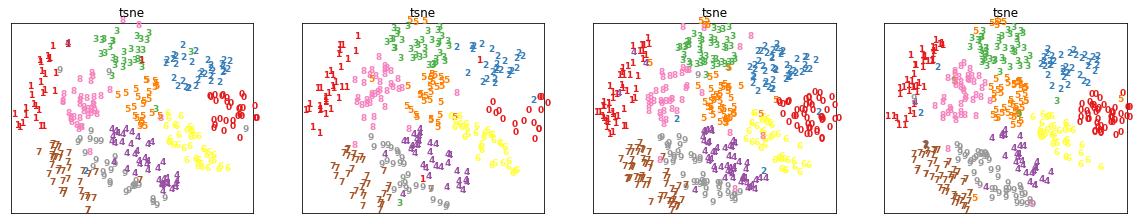

In [48]:
f, axarr = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3.5))

for i in range(4):
    G = all_train_data[i+5]
    int_labels = [int(l) for l in G.labels]
    plot_embedding_subplot(axarr[i], G.target, labels=int_labels, title='tsne')

In [27]:
print([len(G.labels) for G in all_train_data])

[429, 284, 440, 307, 278, 342, 320, 487, 443, 418, 420, 297, 434, 473, 450, 488, 472, 444, 468, 306, 459, 356, 440, 454, 396, 226, 419, 207, 360, 485, 226, 373, 243, 467, 457, 369, 334, 212, 252, 345, 220, 350, 367, 478, 277, 277, 273, 414, 345, 264, 380, 328, 283, 330, 318, 16]


In [28]:
print(len(all_train_data))

56


In [45]:
with open('mnist_train_tsne.pkl', 'wb') as f:
    pickle.dump([inputs, labels, X_emb], f)

In [46]:
print(inputs.shape)
print(labels.shape)
print(X_emb.shape)

torch.Size([20000, 1, 28, 28])
torch.Size([20000])
(20000, 2)
